In [1]:
from models.tf_idf import TFIDFClassifier
from data_loader import AnnotationDataLoader
from model_evaluation import ModelEvalWrapper, ModelEvaluator
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface, ModelReport, ReportsComparison

In [2]:
dataloader = AnnotationDataLoader()
final_test_set = dataloader.get_last_test_set_no_overlap()

In [3]:
tfidf = TFIDFClassifier()
tfidf_model = TFIDFClassifier.load_from_file("models/tf_idf/ComplementNaiveBayes_TF-IDF.pkl")
tfidf_model_wrapper = ModelEvalWrapper(tfidf_model, "ComplementNaiveBayes_TF-IDF")

c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator ComplementNB from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimat

In [4]:
from models.fine_tuned_BERT_models.classifier import BERTBasedModel
from data_loader import AnnotationDataLoader

from train_llm.config import MODELS_DIR

c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dataloader = AnnotationDataLoader()

model_link = "Mila-MP/inPhormer-LLM-classifier"
subfolder = "final_llm"

In [6]:
llm = BERTBasedModel(model_dir=model_link, subfolder=subfolder)
llm_wrapper = ModelEvalWrapper(llm, "LLM, lr 2e-5, 5 epochs, no label smoothing")

In [7]:
from model_evaluation import ModelEvalWrapper, ModelEvaluator, ModelEvalWrapperInterface
from models.embedder_with_classification_head import EmbedderClassifier
from data_loader import AnnotationDataLoader
from models.embedder_with_classification_head.embedders import (
    SentenceTransformerEmbedder,
)
from models.embedder_with_classification_head.classification_heads import (
    GenericSklearnCalssifier,
)
from sklearn.neural_network import MLPClassifier


In [8]:
config = {
    "solver": "adam",
    "random_state": 42,
    "max_iter": 500,
    "learning_rate_init": 0.0001,
    "hidden_layer_sizes": (64, 32),
    "early_stopping": False,
    "alpha": 0.01,
    "activation": "relu",
}

embcls_model = EmbedderClassifier.load_model()
embcls_model.model_info = str(config)
embcls_model.model_title = "Pretrained embedder"

c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [9]:
from models.regex import RegexModel

# Load the regex model and the dataloader 
regex_m = RegexModel()

## Evaluate model
regex_m_wrapper = ModelEvalWrapper(regex_m, "Regex", "The baseline regex classifer")

In [10]:
model_eval_tfidf = ModelEvaluator(tfidf_model_wrapper, final_test_set)
model_eval_llm = ModelEvaluator(llm_wrapper, final_test_set)
model_eval_embcls = ModelEvaluator(embcls_model, final_test_set)
model_eval_regex = ModelEvaluator(regex_m_wrapper, final_test_set)


In [ ]:
tf_idf_report = model_eval_tfidf.generate_report()
llm_report = model_eval_llm.generate_report()
clsemb_report = model_eval_embcls.generate_report()
regex_report = model_eval_regex.generate_report()

In [13]:
cmp = ReportsComparison([tf_idf_report, llm_report, clsemb_report, regex_report])

In [14]:
cmp.show_comparison()

In [15]:
import requests
 # settings for requests
sess = requests.Session()
adapter = requests.adapters.HTTPAdapter(max_retries = 10)
sess.mount("https://", adapter)

def get_protein_name_string(uniprot_id):
    # note: unsure if protein_name is a required field, if we get errors, look into this!
    url = f"https://rest.uniprot.org/uniprotkb/search?query={uniprot_id}&fields=protein_name&format=tsv"
    r = sess.get(url)
    r.raise_for_status()
    content = r.text
    names = content.split('\n')[1:-1]
    # if the UniProt entry was marked as obsolete, access its UniParc accession
    return ";".join([str(name) for name in names])

uniprotIDs = ["A0A1B0GTW7","A5D8V7","A2AJK6","A2AKQ0","A1A6M1","A2AVM0","A0A0G2JTY4","A0A0G2JZ79","A0JN40","A0JN61",
                "Q96LX7","Q8N8F7","Q93YR3","Q67XQ0","Q9D3L0","Q6NZQ0","Q55ED4","P11022","P32857","Q02981",
                "A0A5S9XQF2","Q9FGG0","B9FA11","B7EAC4","A0A0B4KH77","Q9VY08","Q54K29","Q54H65","B3DJF1","F1QHG6"]

annotations = [get_protein_name_string(uniprot_id) for uniprot_id in uniprotIDs]
prop = annotations[:10]
low = annotations[10:20]
un = annotations[20:]

In [28]:
annotations

['Ciliated left-right organizer metallopeptidase (EC 3.4.24.-) (Leishmanolysin-like peptidase 2)',
 'Outer dynein arm-docking complex subunit 3 (Coiled-coil domain-containing protein 151)',
 'Chromodomain-helicase-DNA-binding protein 7 (CHD-7) (EC 3.6.4.-) (ATP-dependent helicase CHD7)',
 'Nucleotide sugar transporter SLC35D1 (Solute carrier family 35 member D1) (UDP-galactose transporter-related protein 7) (UGTrel7) (UDP-glucuronic acid/UDP-N-acetylgalactosamine transporter) (UDP-GlcA/UDP-GalNAc transporter)',
 'Protein disulfide isomerase pTAC5, chloroplastic (EC 5.3.4.1) (Protein PLASTID TRANSCRIPTIONALLY ACTIVE 5) (pTAC5)',
 'Zinc finger protein 341',
 'Nuclear factor of activated T-cells, cytoplasmic 3 (NFATc3) (NFATx) (T-cell transcription factor NFAT4)',
 'NAD-dependent protein deacetylase sirtuin-1 (EC 2.3.1.286) (NAD-dependent protein deacylase sirtuin-1) (EC 2.3.1.-)',
 'Kinesin-like protein KIF3C',
 'DNA-directed RNA polymerase III subunit RPC9 (RNA polymerase III subunit C9

In [16]:
annotations[10:20]

['Coiled-coil domain-containing protein 17',
 'Leucine-rich single-pass membrane protein 1',
 'FAM10 family protein At4g22670',
 'DUF21 domain-containing protein At4g14240 (CBS domain-containing protein CBSDUF1)',
 'Membrane protein FAM174A (Transmembrane protein 157)',
 'Cilia- and flagella-associated protein 119 (Coiled-coil domain-containing protein 189)',
 'NKAP family protein',
 'Membrane protein P8A7',
 'Membrane protein PTM1',
 'ABC1 family protein YPL109C, mitochondrial']

In [17]:
annotations[20:]

['(thale cress) hypothetical protein',
 'Similarity to unknown protein',
 'Uncharacterized protein',
 '(RAP Annotation release2) Hypothetical protein',
 'Uncharacterized protein, isoform D (EC 3.4.11.-)',
 'FI02019p (Uncharacterized protein, isoform A) (Uncharacterized protein, isoform B) (Uncharacterized protein, isoform C (EC 1.-.-.-, EC 1.1.-.-))',
 'Uncharacterized protein',
 'Uncharacterized protein',
 'Hypothetical LOC561073 (Uncharacterized protein LOC561073 precursor) (Zgc:194981)',
 'Im:7138535 (Uncharacterized protein LOC797998)']

In [18]:
print(llm.predict(un))
print(llm.predict(low))
print(llm.predict(prop))

[2 0 0 0 0 0 0 0 0 0]
[2 1 1 1 1 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2]


In [22]:
import pandas as pd
new = pd.DataFrame({"protein_annotation": annotations, "label" : [2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]})

In [24]:
model_eval_llm_new = ModelEvaluator(llm_wrapper, new)
llm_report_new = model_eval_llm_new.generate_report()


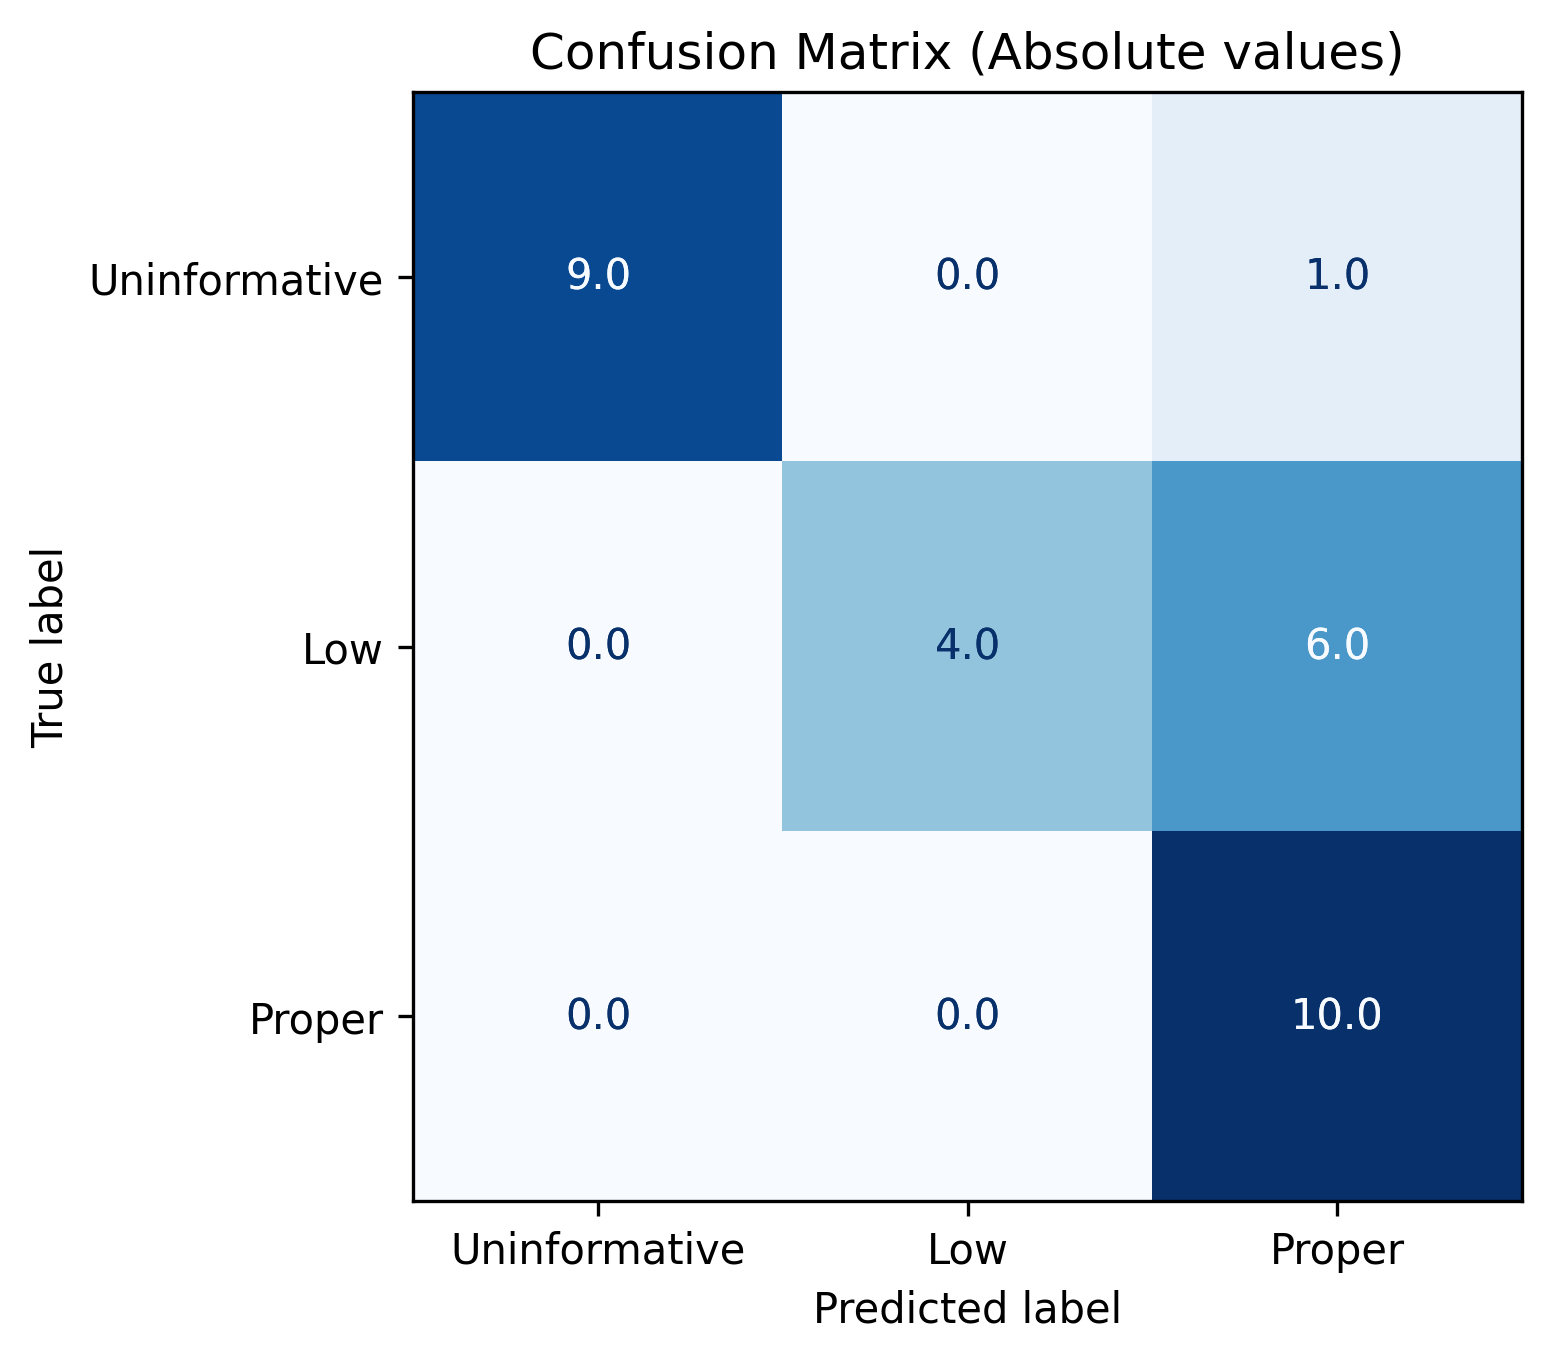
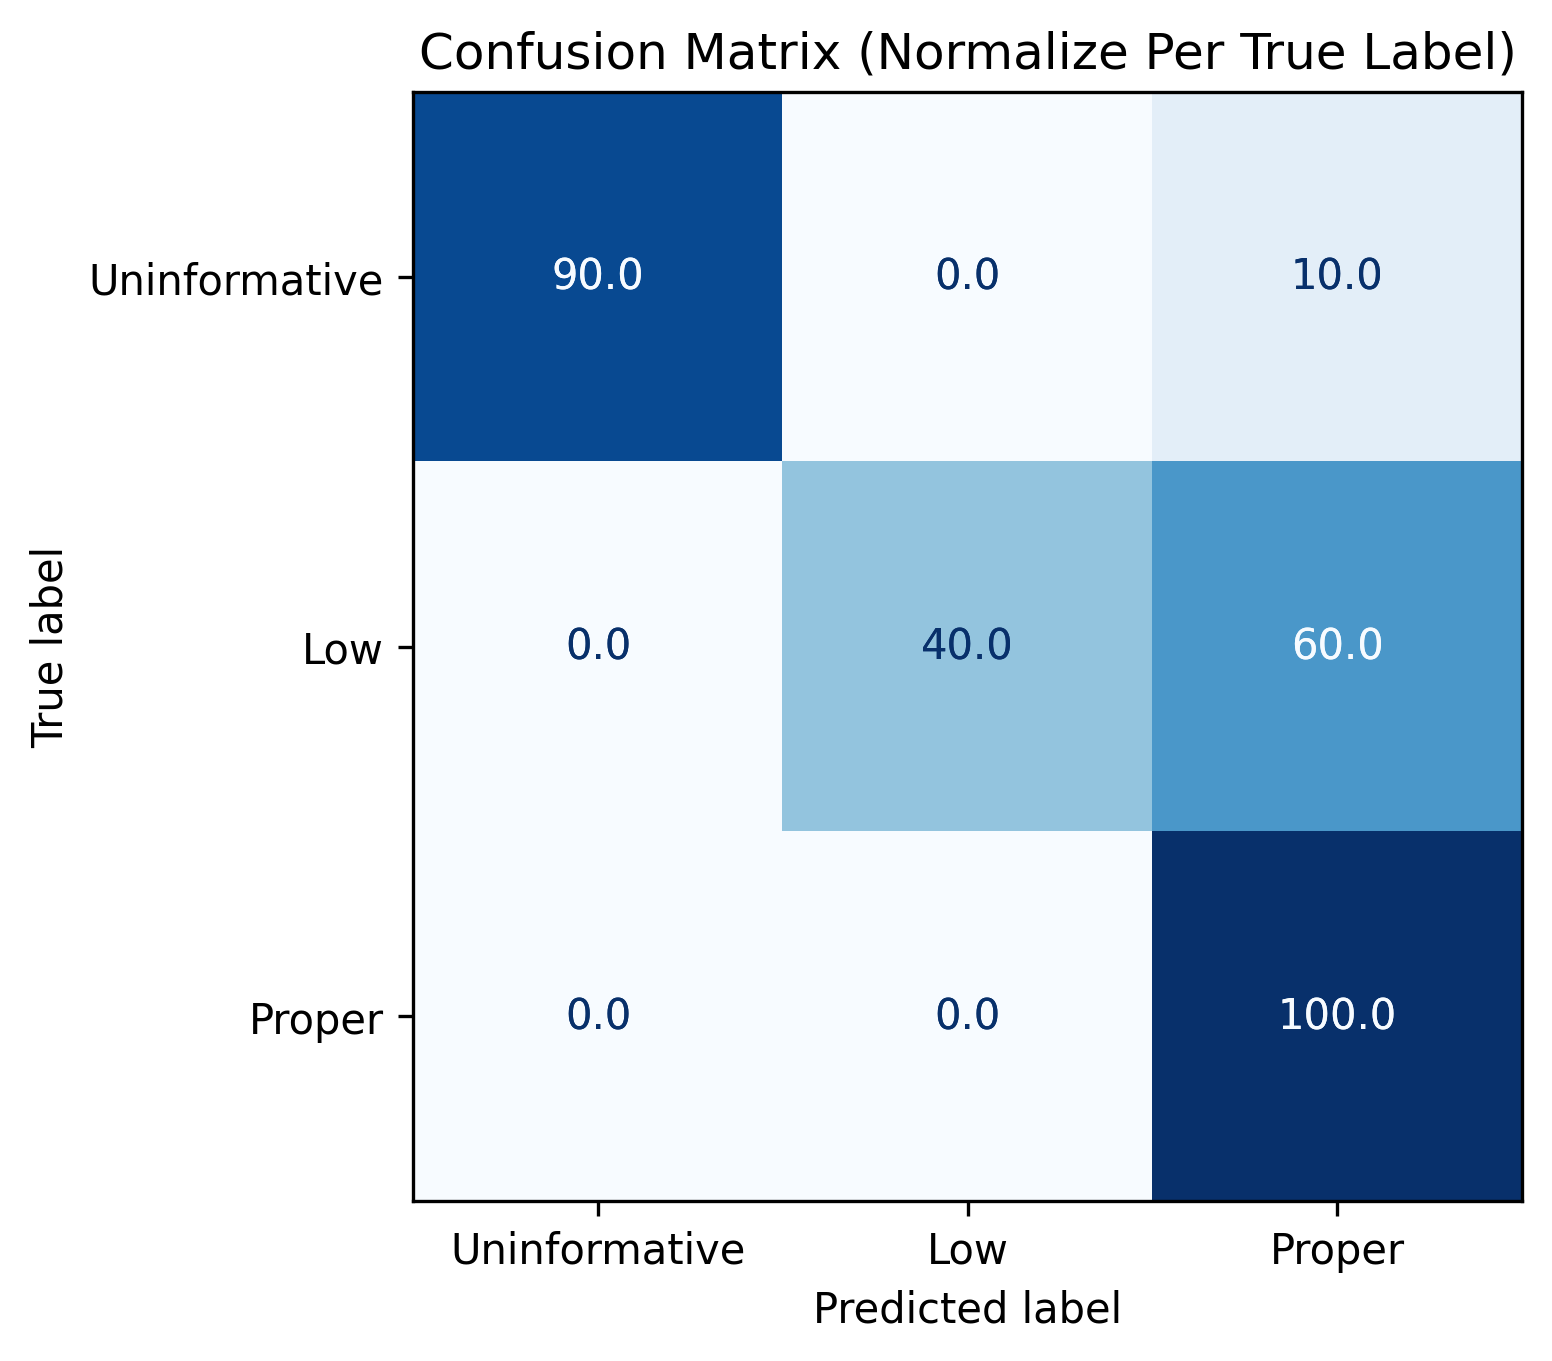

In [27]:
llm_report_new.show_report()

In [29]:
new["predicted_label"] = llm.predict(new["protein_annotation"].tolist())

In [11]:
from faker import Faker
Faker.seed(42)
random_sentences = []
for i in range(30):
    random_sentences.append(Faker().sentence(nb_words=5, variable_nb_words=True))
cleaned_random = [s[:-1] for s in random_sentences]  # remove final period


In [12]:

cleaned_random

['Agent every development',
 'Quality throughout beautiful',
 'All behavior discussion own night',
 'Information last everything thank serve civil',
 'Future choice whatever from behavior',
 'Grow gas enough',
 'Role movie win',
 'Bad fall pick those gun',
 'Relate animal direction eye',
 'Talk term herself',
 'Player half have decide environment',
 'Participant commercial rock',
 'Left establish understand read',
 'Range successful simply director',
 'Source husband at',
 'Then fire pretty how trip learn',
 'Cause seat much section',
 'Today human despite young meeting',
 'Sense technology check',
 'Society instead as high',
 'More wife team activity result',
 'Seem shoulder future fall citizen about',
 'Will seven medical blood',
 'Fear police participant check several much single',
 'Truth out major born guy world',
 'Dream drive note bad',
 'Staff within mouth call process water',
 'Enter their institution deep',
 'Sense ready require human public health',
 'Later easy ask again ne

In [13]:
llm.predict(cleaned_random)

array([0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0])

In [14]:
lab = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
len(lab)

30

In [16]:
import pandas as pd
random = pd.DataFrame({"protein_annotation": cleaned_random, "label" : lab})
from sklearn.metrics import classification_report
random["predicted_label"] = llm.predict(random["protein_annotation"].tolist())
print(classification_report(random["label"], random["predicted_label"]))

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        30
           2       0.00      0.00      0.00         0

    accuracy                           0.23        30
   macro avg       0.50      0.12      0.19        30
weighted avg       1.00      0.23      0.38        30



c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

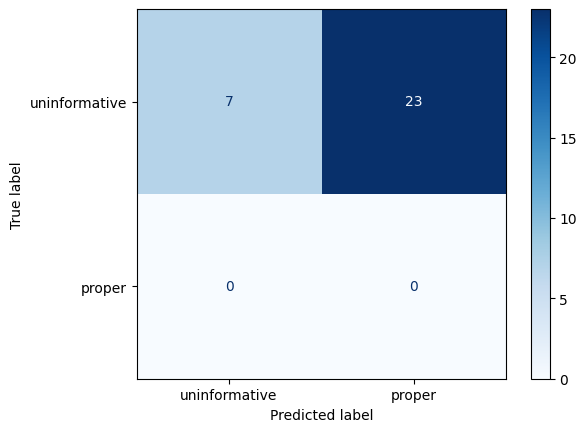

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(random["label"], random["predicted_label"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["uninformative", "proper"])
disp.plot(cmap="Blues", values_format='d')  # 'd' = integer format
plt.show()

In [ ]:
from faker import Faker
Faker.seed(50)
random_sentences_5k = []
for i in range(5000):
    random_sentences_5k.append(Faker().sentence(nb_words=5, variable_nb_words=True))
cleaned_random_5k = [s[:-1] for s in random_sentences_5k]  # remove final period


In [23]:
len(cleaned_random_5k)

5000

In [24]:
random_5k = pd.DataFrame({"protein_annotation": cleaned_random_5k, "label" : [0]*5000})
from sklearn.metrics import classification_report
random_5k["predicted_label"] = llm.predict(random_5k["protein_annotation"].tolist())
print(classification_report(random_5k["label"], random_5k["predicted_label"]))

              precision    recall  f1-score   support

           0       1.00      0.19      0.31      5000
           2       0.00      0.00      0.00         0

    accuracy                           0.19      5000
   macro avg       0.50      0.09      0.16      5000
weighted avg       1.00      0.19      0.31      5000



c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

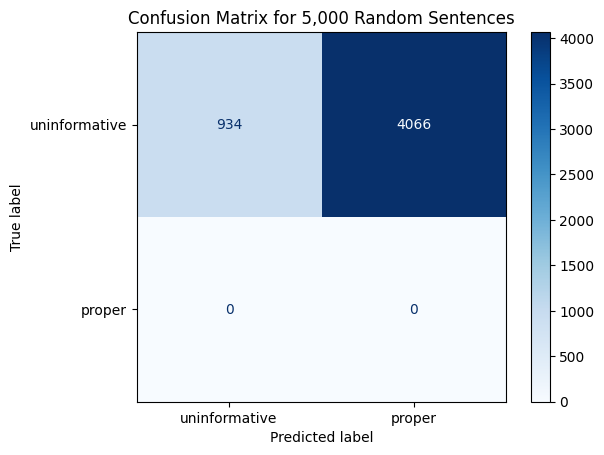

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_5k = confusion_matrix(random_5k["label"], random_5k["predicted_label"])
disp_5k = ConfusionMatrixDisplay(confusion_matrix=cm_5k, display_labels=["uninformative", "proper"])
disp_5k.plot(cmap="Blues", values_format='d')  # 'd' = integer format
plt.title("Confusion Matrix for 5,000 Random Sentences")
plt.show()

In [27]:
from faker import Faker
Faker.seed(23)
random_sentences_20k = []
for i in range(20000):
    random_sentences_20k.append(Faker().sentence(nb_words=5, variable_nb_words=True))
cleaned_random_20k = [s[:-1] for s in random_sentences_20k]  # remove final period


In [28]:
len(cleaned_random_20k)

20000

In [29]:
random_20k = pd.DataFrame({"protein_annotation": cleaned_random_20k, "label" : [0]*20000})
from sklearn.metrics import classification_report
random_20k["predicted_label"] = llm.predict(random_20k["protein_annotation"].tolist())
print(classification_report(random_20k["label"], random_20k["predicted_label"]))

              precision    recall  f1-score   support

           0       1.00      0.19      0.32     20000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.19     20000
   macro avg       0.33      0.06      0.11     20000
weighted avg       1.00      0.19      0.32     20000



c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\caraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

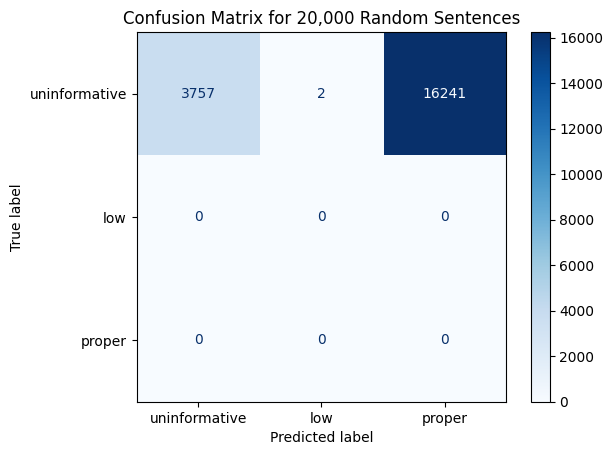

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_20k = confusion_matrix(random_20k["label"], random_20k["predicted_label"])
disp_20k = ConfusionMatrixDisplay(confusion_matrix=cm_20k, display_labels=["uninformative", "low", "proper"])
disp_20k.plot(cmap="Blues", values_format='d')  # 'd' = integer format
plt.title("Confusion Matrix for 20,000 Random Sentences")
plt.show()

In [35]:
random_20k[random_20k["predicted_label"] == 1]

,protein_annotation,label,predicted_label
1742,Indicate wall half recently,0,1
18839,Short together structure,0,1


In [2]:
llm_cpu = ModelReport.load_report("llm_report_cpu.txt")
llm_gpu = ModelReport.load_report("llm_report_gpu.txt")
emb_cpu = ModelReport.load_report("clsemb_report_cpu.txt")
emb_gpu = ModelReport.load_report("clsemb_report_gpu.txt")
tfidf_cpu = ModelReport.load_report("tf_idf_report_cpu.txt")
tfidf_gpu = ModelReport.load_report("tf_idf_report_gpu.txt")
regex_cpu = ModelReport.load_report("regex_report_cpu.txt")
regex_gpu = ModelReport.load_report("regex_report_gpu.txt")


In [3]:
import pandas as pd
all_ann = regex_cpu.prediction_df()["protein_annotation"]
truelabel = regex_cpu.prediction_df()["true_label"]
reglabel = regex_cpu.prediction_df()["predicted_label"]
tflabel = tfidf_cpu.prediction_df()["predicted_label"]
clslabel = emb_cpu.prediction_df()["predicted_label"]
llmlabel = llm_cpu.prediction_df()["predicted_label"]


all_preds = pd.DataFrame({"protein_annotation":all_ann, 
                          "true_label": truelabel,
                          "reg": reglabel,
                          "tf": tflabel,
                          "cls":clslabel,
                          "llm":llmlabel})

In [4]:
pred_cols = ["reg", "cls", "tf", "llm"]

# Compare each prediction to the true_label → True if misclassified
misclassified = all_preds[pred_cols].ne(all_preds["true_label"], axis=0)

# Count misclassifications per row
all_preds["n_missed"] = misclassified.sum(axis=1)


In [5]:
total_missed = misclassified.values.sum()
print(total_missed)


1035


In [8]:
# columns: protein_annotation, true_label, reg, tf, cls, llm

pred_cols = ["reg", "tf", "cls", "llm"]

# True where each model's prediction != true_label
mis_flags = all_preds[pred_cols].ne(all_preds["true_label"], axis=0)

# rows misclassified by *all* models
mask_all_mis = mis_flags.all(axis=1)

all_mis_by_all_models = all_preds[mask_all_mis]
all_mis_by_all_models.drop(columns=["n_missed"], inplace=True)
print(len(all_mis_by_all_models))   # should be 53


53


C:\Users\caraj\AppData\Local\Temp\ipykernel_42256\3275760415.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_mis_by_all_models.drop(columns=["n_missed"], inplace=True)


In [9]:
cond_same = (
    (all_preds["reg"] == all_preds["tf"]) &
    (all_preds["reg"] == all_preds["cls"]) &
    (all_preds["reg"] == all_preds["llm"])
)

cond_diff_from_true = all_preds["reg"] != all_preds["true_label"]

result = all_preds[cond_same & cond_diff_from_true]
